# Loading dataset

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal
from scipy.io import wavfile
import os

In [70]:
def read_wav_file(file_path):
    try:
        sample_rate, samples = wavfile.read(file_path)
        print("reading wav file ...")
        response = {"status": 200, "message": "wav file read successfully", "file_name" : file_path, "sample_rate": sample_rate, "samples": samples}
        print("succesfully read wav file ...")
        return response
    except Exception as e :
        print(f"error whiule reading {file_path} file .... X")
        response = {"status": 400, "message": f"Error reading {file_path} wav file", "file_name" : file_path}
        return response


def read_split_write_wav_file(file_path, split_size):
    try:
        sample_rate, samples = wavfile.read(file_path)
        time_seconds = len(samples) / sample_rate
        time_miliseconds = time_seconds * 1000
        number_windows = int(time_miliseconds / split_size)
        split_size_samples = int((split_size / 1000) * sample_rate)

        windows = []
        for i in range(number_windows):
            start = i * split_size_samples
            end = start + split_size_samples
            window = samples[start:end]
            windows.append(window)

        remaining_samples = len(samples) % split_size_samples
        if remaining_samples > 0:
            last_window = samples[-remaining_samples:]
            if len(last_window) < split_size_samples:
                padding = np.zeros(split_size_samples - len(last_window), dtype=samples.dtype)
                last_window = np.concatenate((last_window, padding))
            windows.append(last_window)

        windows_array = np.array(windows)

        print(f"Duration of file in seconds: {time_seconds}, milliseconds: {time_miliseconds}, full windows: {number_windows}")
        print(f"Total windows after zero-padding: {len(windows)}")
        print(f"Shape of windows array: {windows_array.shape}")

        folder_name = os.path.splitext(os.path.basename(file_path))[0]
        os.makedirs(folder_name, exist_ok=True)

        for i, window in enumerate(windows):
            output_file = os.path.join(folder_name, f"{folder_name}_{i + 1}.wav")
            wavfile.write(output_file, sample_rate, window)
            print(f"Saved: {output_file}")

        return windows_array, sample_rate

    except Exception as e:
        print(f"Error while reading {file_path} file: {e}")
        return None, None

In [71]:
def read_dir_wav_file_(dir_path):
    wav_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".wav"):
            wav_files.append(os.path.join(dir_path, file))
    return wav_files


def read_wav_dataset(dir_path):
    wav_files = read_dir_wav_file_(dir_path)
    dataset = []
    for file in wav_files:
        dataset.append(read_wav_file(file))
    return dataset

In [75]:
read_split_write_wav_file("dataset/aud1.wav",1000)

Duration of file in seconds: 2.1735, milliseconds: 2173.5, full windows: 2
Total windows after zero-padding: 3
Shape of windows array: (3, 48000)
Saved: aud1/aud1_1.wav
Saved: aud1/aud1_2.wav
Saved: aud1/aud1_3.wav


(array([[-1, -1, -1, ..., 18, 22, 27],
        [31, 33, 32, ..., -1, -1, -1],
        [-1,  0, -1, ...,  0,  0,  0]], dtype=int16),
 48000)

In [49]:
def plot_signal(request):
    title = f"Signal of file {request['file_name']}"
    request["sample_rate"]
    request["samples"]
    time_seconds = np.arange(0, len(request["samples"])) / request["sample_rate"]
    plt.figure(figsize=(10, 6))
    plt.plot(time_seconds, request["samples"], label="Signal")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.show()


def plot_signal_scatter(request):
    title = f"Signal of file {request['file_name']}"
    sample_rate = request["sample_rate"]
    samples = request["samples"]

    time_seconds = np.arange(0, len(samples)) / sample_rate

    plt.figure(figsize=(10, 6))
    plt.scatter(time_seconds, samples, label="Signal", color='blue', marker='o', s=10)  # Scatter plot
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.show()


In [45]:
print(read_dir_wav_file_("dataset"))

['dataset/aud0.wav', 'dataset/aud3.wav', 'dataset/aud1.wav', 'dataset/aud2.wav', 'dataset/aud4.wav']


In [46]:
DATASET = read_wav_dataset("dataset")

reading wav file ...
succesfully read wav file ...
reading wav file ...
succesfully read wav file ...
reading wav file ...
succesfully read wav file ...
reading wav file ...
succesfully read wav file ...
reading wav file ...
succesfully read wav file ...


In [47]:
print(DATASET)

[{'status': 200, 'message': 'wav file read successfully', 'file_name': 'dataset/aud0.wav', 'sample_rate': 48000, 'samples': array([-1, -1, -1, ..., -1, -2, -2], dtype=int16)}, {'status': 200, 'message': 'wav file read successfully', 'file_name': 'dataset/aud3.wav', 'sample_rate': 48000, 'samples': array([-1, -1, -1, ..., -5, -5, -4], dtype=int16)}, {'status': 200, 'message': 'wav file read successfully', 'file_name': 'dataset/aud1.wav', 'sample_rate': 48000, 'samples': array([-1, -1, -1, ...,  0,  0, -1], dtype=int16)}, {'status': 200, 'message': 'wav file read successfully', 'file_name': 'dataset/aud2.wav', 'sample_rate': 48000, 'samples': array([-1, -1, -1, ...,  0,  0,  0], dtype=int16)}, {'status': 200, 'message': 'wav file read successfully', 'file_name': 'dataset/aud4.wav', 'sample_rate': 48000, 'samples': array([-1, -1, -1, ...,  1,  1,  1], dtype=int16)}]


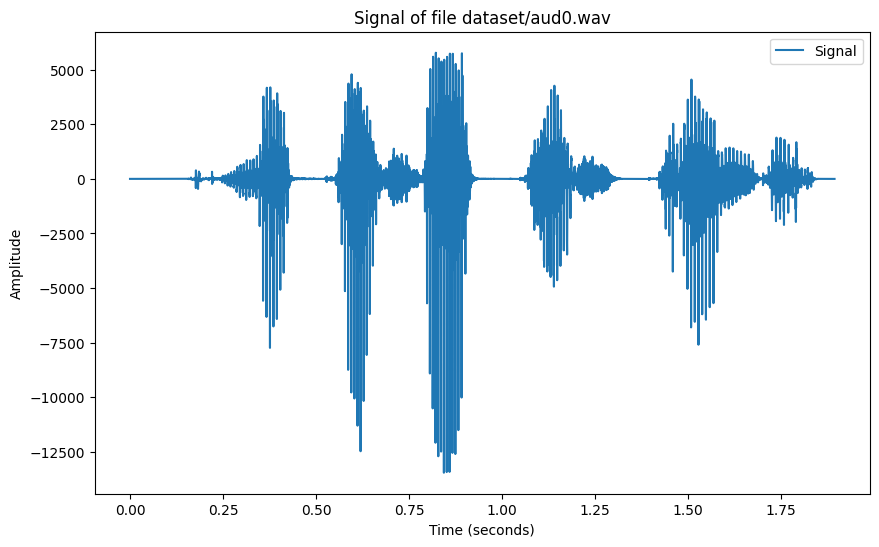

In [50]:
plot_signal(DATASET[0])

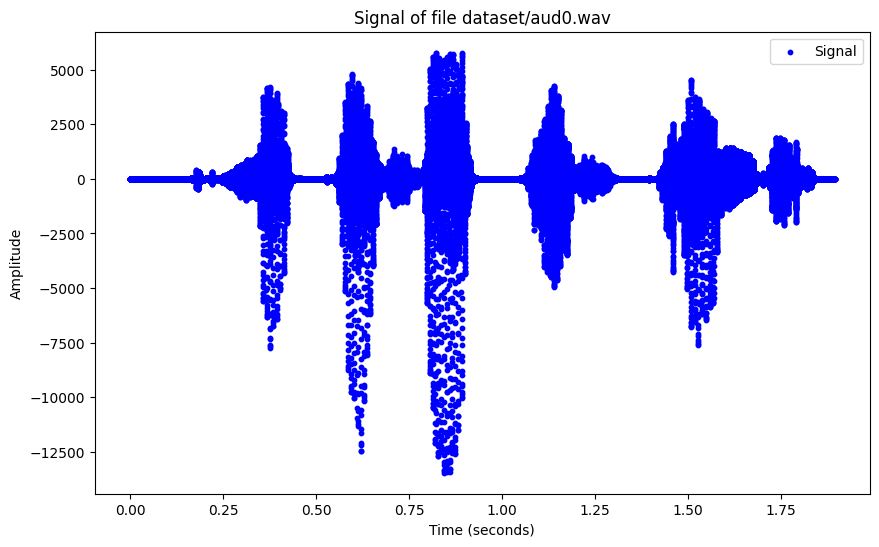

In [51]:
plot_signal_scatter(DATASET[0])